Установка необходимых пакетов и импорт библиотек

In [3]:
!pip3 install anndata
!pip3 install scanpy
!pip3 install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 12.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=022fe85a24650a380ffaf425513499c07b56e744c03f1411e9b2a6f4f1f5cf0c
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=c40568824ab01a3f2ed6b762122ea07d26952489b27fcce7c895b71f5eafbcc6
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9b

In [80]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)

In [57]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
  link = f'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}_AB{ab}.txt.gz'
  fille = f'GSM278{gsm}_AB{ab}.txt.gz'
  !wget -c -nv $link
  !gzip -f -d $fille

2023-12-09 15:33:32 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787017/suppl/GSM2787017_AB1395.txt.gz [484276/484276] -> "GSM2787017_AB1395.txt.gz" [1]
2023-12-09 15:33:32 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787018/suppl/GSM2787018_AB1396.txt.gz [398303/398303] -> "GSM2787018_AB1396.txt.gz" [1]
2023-12-09 15:33:33 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787019/suppl/GSM2787019_AB1398.txt.gz [490402/490402] -> "GSM2787019_AB1398.txt.gz" [1]
2023-12-09 15:33:33 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787020/suppl/GSM2787020_AB1458.txt.gz [393417/393417] -> "GSM2787020_AB1458.txt.gz" [1]
2023-12-09 15:33:34 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787021/suppl/GSM2787021_AB1459.txt.gz [482002/482002] -> "GSM2787021_AB1459.txt.gz" [1]
2023-12-09 15:33:35 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787022/suppl/GSM2787022_AB1539.txt.gz [348159/348159] -> "GSM2787022_AB1539.txt.

In [58]:
!ls

GSM2787017_AB1395.txt  GSM2787023_AB1540.txt  GSM2787029_AB1646.txt  GSM2787035_AB1792.txt
GSM2787018_AB1396.txt  GSM2787024_AB1541.txt  GSM2787030_AB1647.txt  GSM2787036_AB1793.txt
GSM2787019_AB1398.txt  GSM2787025_AB1542.txt  GSM2787031_AB1648.txt  GSM2787037_AB1795.txt
GSM2787020_AB1458.txt  GSM2787026_AB1544.txt  GSM2787032_AB1649.txt  sample_data
GSM2787021_AB1459.txt  GSM2787027_AB1545.txt  GSM2787033_AB1751.txt
GSM2787022_AB1539.txt  GSM2787028_AB1546.txt  GSM2787034_AB1753.txt


# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns

In [59]:
counts = pd.concat([pd.read_csv(f'GSM278{gsm}_AB{ab}.txt', sep='\s', header=0) for gsm, ab in gsm_list], axis=1)
counts

<ipython-input-59-1b795aadde22>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counts = pd.concat([pd.read_csv(f'GSM278{gsm}_AB{ab}.txt', sep='\s', header=0) for gsm, ab in gsm_list], axis=1)
<ipython-input-59-1b795aadde22>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counts = pd.concat([pd.read_csv(f'GSM278{gsm}_AB{ab}.txt', sep='\s', header=0) for gsm, ab in gsm_list], axis=1)
<ipython-input-59-1b795aadde22>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you ca

,W291665,W291666,W291667,W291668,W291669,W291670,W291671,W291672,W291673,W291674,...,W432007,W432008,W432009,W432010,W432011,W432012,W432013,W432014,W432015,W432016
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




In [60]:
# choose only cells from the provided file

id_author = pd.read_csv("https://drive.google.com/uc?id=1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G", sep="\t", index_col=0)
id_author

,clust,group
W160351,2,mTEC-IV
W160352,32,mTEC-III
W160353,35,mTEC-II
W160357,34,mTEC-II
W160358,3,mTEC-IV
...,...,...
W271100,30,mTEC-II
W271101,23,mTEC-III
W271102,35,mTEC-II
W271106,20,mTEC-I


In [61]:
common = set(counts.columns) & set(id_author.index)
counts = counts.loc[:, common]
counts

<ipython-input-61-bca0398b1671>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  counts = counts.loc[:, common]


,W341018,W378482,W378704,W431910,W431479,W339756,W314832,W378599,W379074,W291752,...,W379135,W341193,W378505,W416194,W431413,W291760,W339894,W315044,W291689,W416215
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,1,0,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0610007L01Rik,0,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
0610007P08Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

###Нормализация

In [63]:
# normalization (TPM (transcripts per million), FPKM (fragments per kilobase of transcript per million fragments mapped),
# normalized counts using coefficient of variation, intraclass correlation coefficient).

for column in counts:
    counts[column] = (1e6/counts[column].sum())*counts[column]
counts

,W341018,W378482,W378704,W431910,W431479,W339756,W314832,W378599,W379074,W291752,...,W379135,W341193,W378505,W416194,W431413,W291760,W339894,W315044,W291689,W416215
0610005C13Rik,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
0610007C21Rik,0.0,149.499178,0.0,191.460846,0.0,509.251400,398.565165,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,465.116279,0.0,0.0,0.000000,0.0
0610007L01Rik,0.0,149.499178,0.0,0.000000,0.0,0.000000,0.000000,0.0,646.203554,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
0610007P08Rik,0.0,149.499178,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
0610007P14Rik,0.0,0.000000,0.0,0.000000,0.0,169.750467,0.000000,0.0,0.000000,532.197978,...,0.0,951.474786,0.0,0.0,0.0,0.000000,0.0,0.0,471.253534,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
snoZ178,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
snoZ39,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
snoZ40,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [64]:
counts.loc['group', :] = id_author.T.loc['group', counts.columns]
counts.sort_values(by='group', axis=1, inplace=True)

#оставляем только маркеры
data_normalized = counts.loc[markers, :]
data_normalized

,W292304,W431598,W340669,W339814,W315026,W341106,W291836,W340256,W292325,W291738,...,W379073,W379071,W341189,W340213,W379141,W314885,W291936,W378638,W378733,W292399
Ctsl,19733.215742,3303.536728,3683.241252,9020.618557,7840.342124,2738.05902,12814.194184,27219.991075,17781.851512,8104.738155,...,0.0,282.167043,0.0,0.0,0.0,0.0,1367.053999,0.0,0.0,0.0
Psmb11,1322.897145,0.0,920.810313,1288.659794,1425.51675,0.0,2464.268112,1338.688086,5316.223648,623.441397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prss16,2921.397861,777.302759,4604.051565,1288.659794,0.0,304.22878,246.426811,892.458724,5499.541705,623.441397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ascl1,0.0,0.0,0.0,0.0,712.758375,0.0,0.0,446.229362,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.804617,0.0,0.0
Sox4,0.0,194.32569,0.0,0.0,712.758375,1216.91512,739.280434,446.229362,0.0,0.0,...,0.0,1410.835214,603.864734,0.0,0.0,0.0,0.0,0.0,1183.431953,329.597891
Ccl21a,440.965715,0.0,0.0,5154.639175,0.0,0.0,0.0,4016.064257,0.0,2493.765586,...,495.049505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.597891
Apoe,606.327858,388.65138,1841.620626,0.0,3563.791875,1825.37268,0.0,0.0,916.590284,7481.296758,...,0.0,0.0,0.0,0.0,0.0,700.770848,683.526999,0.0,0.0,0.0
Ly6a,0.0,0.0,920.810313,0.0,4276.550249,1825.37268,0.0,0.0,183.318057,0.0,...,0.0,282.167043,0.0,0.0,0.0,0.0,0.0,0.0,2366.863905,0.0
Ccl21c,110.241429,0.0,0.0,1288.659794,0.0,0.0,0.0,1784.917448,0.0,0.0,...,0.0,282.167043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aire,110.241429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,495.049505,0.0,0.0,0.0,2275.312856,2102.312544,0.0,0.0,0.0,0.0


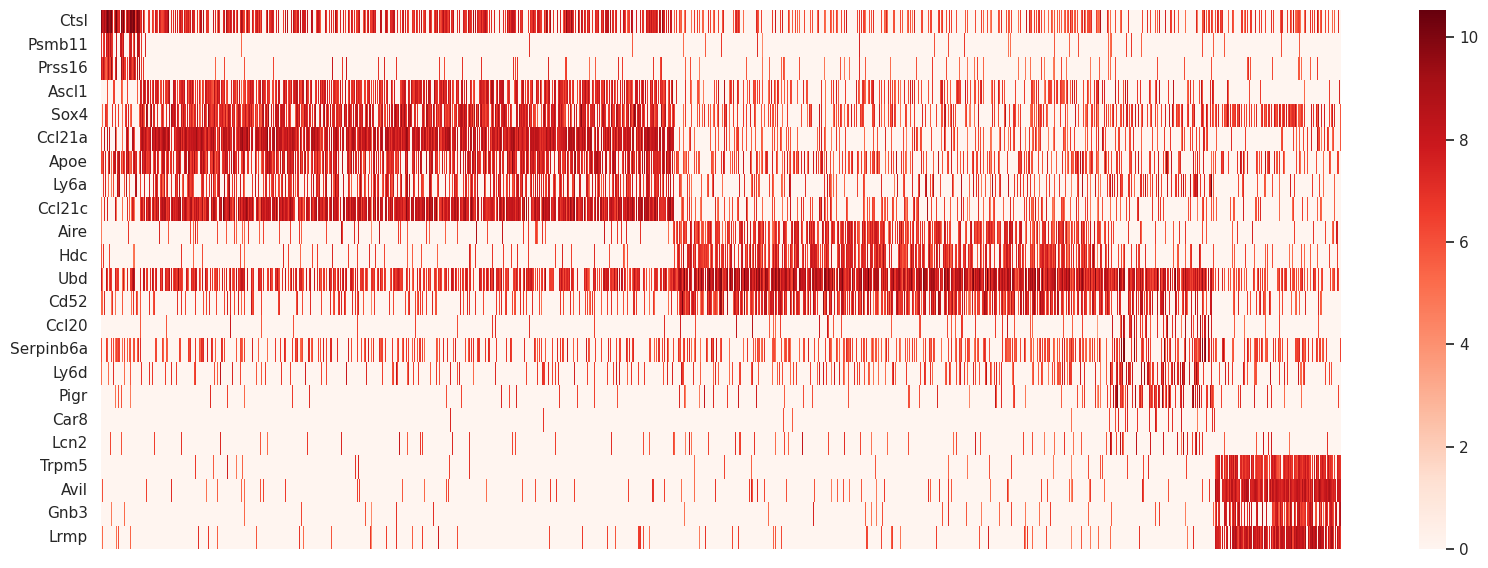

In [65]:
data_normalized = data_normalized.astype(float)

f, ax = plt.subplots(figsize=(20, 7))
ax = sns.heatmap(np.log(data_normalized + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

# Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [66]:
# counts_norm - normalized data

adata = ad.AnnData(counts.drop(index='group').T)
sc.pp.log1p(adata)
# adata.var_names = list(counts_norm.index)
# adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

In [67]:
# add to metadata cell type provided by authors
cells_type_data = counts.loc['group', :]

In [68]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = cells_type_data

In [69]:
sc.pp.pca(adata, n_comps=50)

In [70]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

<ipython-input-70-06ed9cd57294>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(ListedColormap(colors))


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


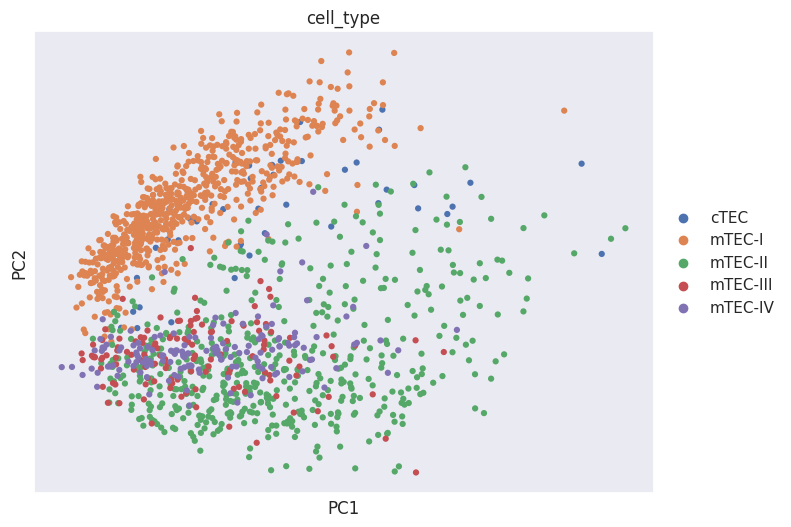

In [71]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
#for i, c in enumerate(colors):
#  print(f'{groups[i]} - {c}')

In [72]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


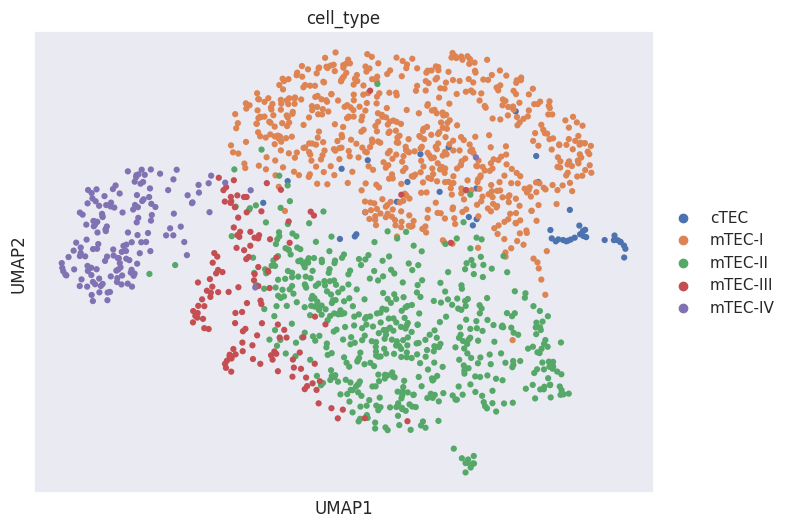

In [73]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()
#for i, c in enumerate(colors):
#  print(f'{groups[i]} - {c}')

## Бонусная часть задания

In [27]:
rep1 = pd.read_csv("https://drive.google.com/uc?id=1jDnstauvQvZsm_89saoUKTVykSicZPc2", sep="\t", names=["Gene", "Counts"], index_col=0)
rep2 = pd.read_csv("https://drive.google.com/uc?id=1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe", sep="\t", names=["Gene", "Counts"], index_col=0)
rep2

,Counts
Gene,
Gnai3,4966
Pbsn,4
Cdc45,392
H19,1220
Scml2,85
...,...
AC156032.1,2
BX681418.1,0
AL606917.1,3


In [35]:
#нормализуем данные
rep1 = (1e6/rep1.sum(axis=0))*rep1
rep2 = (1e6/rep2.sum(axis=0))*rep2
rep2

,Counts
Gene,
Gnai3,154.409877
Pbsn,0.124374
Cdc45,12.188617
H19,37.933961
Scml2,2.642940
...,...
AC156032.1,0.062187
BX681418.1,0.000000
AL606917.1,0.093280


In [55]:
#для каждого гена берем среднее значение TPM по двум репликам
com = set(rep1.index) & set(rep2.index)
mean_val = [(name, np.mean([rep1.loc[name, "Counts"], rep2.loc[name, "Counts"]], dtype = np.float64)) for name in com]
names, val = list(zip(*mean_val))
bulk = pd.DataFrame({1: val}, index=names).loc[:, 1]
bulk

Nfia        51.001471
Cuta        45.346394
Mir3473f     0.000000
Gm29056      0.000000
Gm45548      0.288627
              ...    
Gm24161      0.015547
Vmn1r49      0.038022
Nkain4       3.563395
Il1r1       92.957047
Oas1e       25.722803
Name: 1, Length: 55291, dtype: float64

In [75]:
#для каждого гена берем среднее значение TPM по всем клеткам scRNA-seq (подгруппа  mTEC-IV)
sc_seq = counts.loc[:, counts.columns[counts.loc['group', :] == "mTEC-IV"]].drop(index='group').mean(axis=1)

In [83]:
#подготовили выборку (взяли все маркерные из первой части)
ind = set(bulk.index) & set(sc_seq.index) & set(markers)

<ipython-input-86-33a7252bc032>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.scatter(x=bulk[ind].values, y=sc_seq[ind].values)
<ipython-input-86-33a7252bc032>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.scatter(x=bulk[ind].values, y=sc_seq[ind].values)


Text(0, 0.5, 'scRNA-seq')

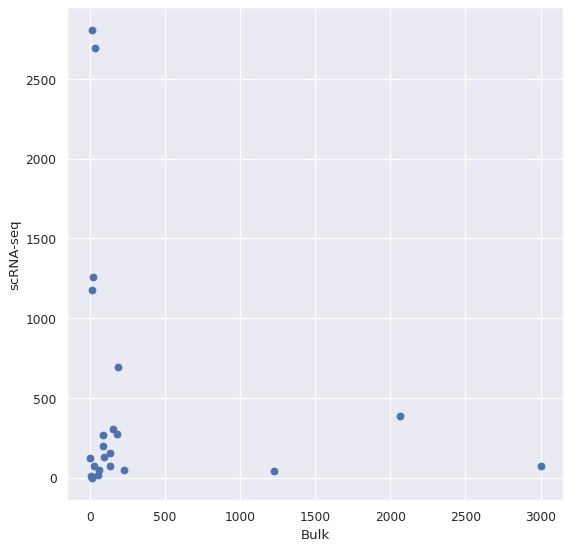

In [86]:
#рисуем график - можно сделать следующий вывод:
#                примерно 2/3 эксперсий генов приближенно равны, все они находятся в нижнем левом квадрате с небольшим TPM
figure(figsize=(8, 8), dpi=80)

plt.scatter(x=bulk[ind].values, y=sc_seq[ind].values)
plt.xlabel("Bulk")
plt.ylabel("scRNA-seq")

In [88]:
#100-200 наиболее высоко-экспрессированных генов как в bulk, так и scRNA
ind = (set(sc_seq.nlargest(150).index) | set(bulk.nlargest(150))) & set(sc_seq.index) & set(bulk.index)

<ipython-input-89-6e8fd2e3b232>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.scatter(x=bulk[ind].values, y=sc_seq[ind].values)
<ipython-input-89-6e8fd2e3b232>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.scatter(x=bulk[ind].values, y=sc_seq[ind].values)


Text(0, 0.5, 'scRNA-seq')

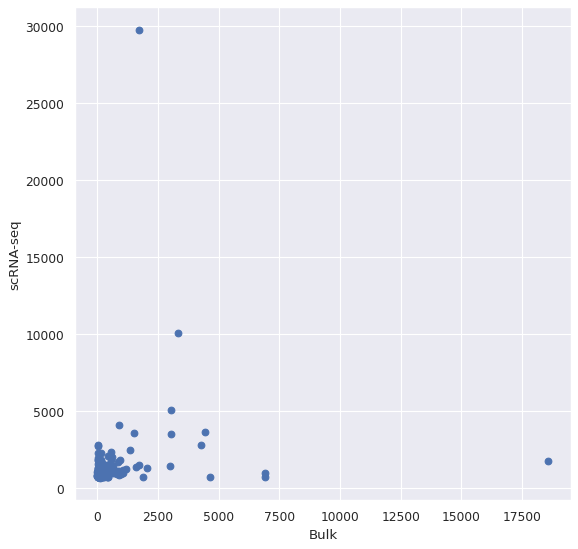

In [89]:
#рисуем график - можно сделать следующий вывод:
#                нельзя понять, какое количество экспрессий примерно равно - слишком много выбросов
figure(figsize=(8, 8), dpi=80)

plt.scatter(x=bulk[ind].values, y=sc_seq[ind].values)
plt.xlabel("Bulk")
plt.ylabel("scRNA-seq")